## Flights data analysis

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("2008.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [8]:
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4402486,2008,8,28,4,NaN,1650,NaN,1842,OH,5448,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2641282,2008,5,30,5,1841.0,1845,2041.0,2056,UA,1502,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1177359,2008,3,3,1,1155.0,1145,1323.0,1315,WN,1668,...,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
338304,2008,1,2,3,1818.0,1805,2135.0,2116,EV,4650,...,23.0,9.0,0,NaN,0,13.0,0.0,6.0,0.0,0.0
2059445,2008,4,13,7,1858.0,1859,2321.0,2326,US,548,...,7.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


### What is the structure of your dataset?

This dataset consists of: 
Year                 
Month                
DayofMonth           
DayOfWeek            
DepTime            
CRSDepTime         Schedueled Deprature time  
ArrTime            
CRSArrTime         Schedueled Arrival time  
UniqueCarrier       
FlightNum            
TailNum             
ActualElapsedTime  
CRSElapsedTime     Schedueled Elapsed time
AirTime            
ArrDelay           
DepDelay           
Origin              Airport plane departed from
Dest                
Distance             
TaxiIn             
TaxiOut            
 Cancelled            
 CancellationCode    reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 Diverted             
 CarrierDelay       
 WeatherDelay       
 NASDelay           
 SecurityDelay      
 LateAircraftDelay  


### What is/are the main feature(s) of interest in your dataset?

#### Which is busiest month.
#### What is the most reason for cancellation.
#### Rate of cancellation.
#### Most frequent month in cancellation.
#### Most frequent month in delay.
#### Busiest origin and DEstination airports

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### Month
#### Cancellation code
#### Cancelled
#### DepDelay
#### Origin
#### Destination

## Cleaning 

### Remove unneeded columns: TaxiIn, TaxiOut, TailNum, Year, DayofMonth, DayOfWeek, FlightNum, TailNum, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, ActualElapsedTime, CRSElapsedTime
### Change type of (DepTime, CRSDepTime, ArrTime, CRSArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay) to time data type

In [3]:
# Creat copy of the data
df_copy = df.copy()

In [4]:
df_copy.drop(['TaxiIn', 'TaxiOut', 'FlightNum', 'TailNum', 'Year', 'DayofMonth', 'DayOfWeek', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Diverted', 'ActualElapsedTime', 'CRSElapsedTime'], axis = 1, inplace = True)

In [99]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 16 columns):
 #   Column            Dtype          
---  ------            -----          
 0   Month             int64          
 1   DepTime           timedelta64[ns]
 2   CRSDepTime        timedelta64[ns]
 3   ArrTime           timedelta64[ns]
 4   CRSArrTime        timedelta64[ns]
 5   UniqueCarrier     object         
 6   AirTime           float64        
 7   ArrDelay          float64        
 8   DepDelay          float64        
 9   Origin            category       
 10  Dest              category       
 11  Distance          int64          
 12  Cancelled         int64          
 13  CancellationCode  object         
 14  DepStatus         object         
 15  ArrStatus         object         
dtypes: category(2), float64(3), int64(3), object(4), timedelta64[ns](4)
memory usage: 775.5+ MB


In [5]:
#Changing data type to time
df_copy[['DepTime','CRSDepTime', 'ArrTime', 'CRSArrTime']] = df_copy[['DepTime','CRSDepTime', 'ArrTime', 'CRSArrTime']].apply(lambda x: pd.to_timedelta(x))

In [6]:
#Changing data type to category
df_copy[['Origin', 'Dest']] = df_copy[['Origin', 'Dest']].apply(lambda x: x.astype('category'))

In [7]:
# Create two columns (status) with Ontime, Late and Cancelled status for both departure and arrival
df_copy.loc[df_copy.DepDelay.isna(), "DepStatus"]="Canceled"
df_copy.loc[df_copy.DepDelay <= 0, "DepStatus"]="OnTime"
df_copy.loc[df_copy.DepDelay > 0, "DepStatus"]="Late"
df_copy.loc[df_copy.ArrDelay.isna(), "ArrStatus"]="Canceled"
df_copy.loc[df_copy.ArrDelay <= 0, "ArrStatus"]="OnTime"
df_copy.loc[df_copy.ArrDelay > 0, "ArrStatus"]="Late"

## Univariate Exploration

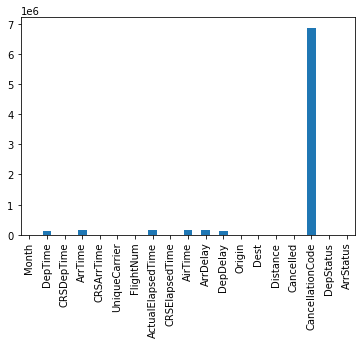

In [31]:
NAs = df_copy.isnull().sum()
NAs.plot(kind = 'bar')
plt.show()

### **We see that CancellationCode has a noticeable number of nulls lets see why?**

<AxesSubplot:xlabel='Cancelled'>

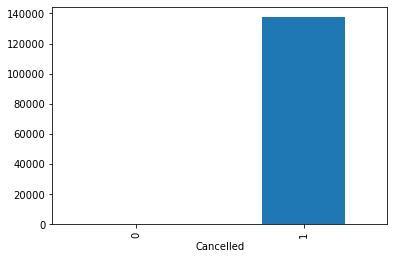

In [29]:
df2 = df_copy.groupby('Cancelled')['CancellationCode'].count()
df2.plot(kind = 'bar')

### **This explains the high number of nulls in Cancellation Code is that when the flight isn't cancelled we have empty Cancellation Code and later we will prove that by comparing number of cancelled flights to other status**

In [100]:
df_copy.loc[df_copy.CancellationCode == "A", "Reason"]="Carrier"
df_copy.loc[df_copy.CancellationCode == "B", "Reason"]="Weather"
df_copy.loc[df_copy.CancellationCode == "C", "Reason"]="NAS"
df_copy.loc[df_copy.CancellationCode == "D", "Reason"]="Security"

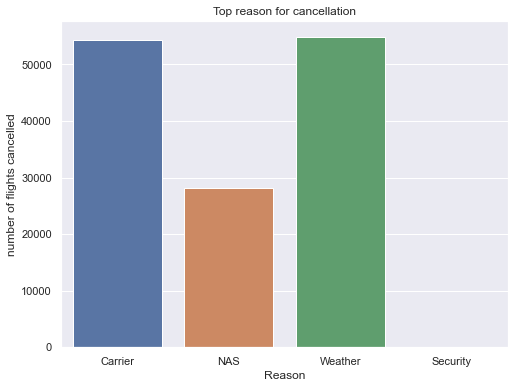

In [108]:
df_copy['Reason'] = df_copy['Reason'].sort_values()
sb.countplot(data=df_copy, x='Reason').set(title='Top reason for cancellation')
plt.ylabel("number of flights cancelled");

### **We can see that weather is the most frequent reason for cancellation**

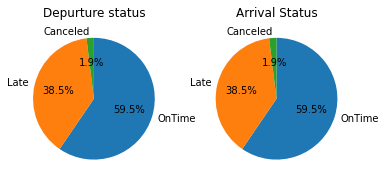

In [23]:
plt.subplot(1,2,1)
sorted_counts = df_copy['DepStatus'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%',counterclock = False)
plt.title('Depurture status')

plt.subplot(1,2,2)
sorted_counts2 = df_copy['ArrStatus'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts2.index, startangle = 90, autopct='%1.1f%%',counterclock = False)
plt.title('Arrival Status');

### **We can see that 59.5% of the flights arrived on time and only 1.9% are cancelled**

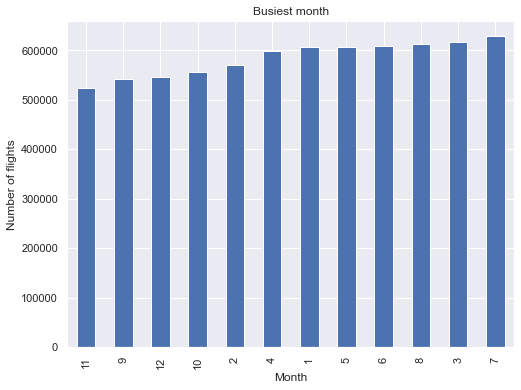

In [106]:
busy_month = df_copy.groupby(['Month'])['Month'].count()
busy_month = busy_month.sort_values()
busy_month.plot(kind = 'bar')
plt.ylabel("Number of flights")
plt.title("Busiest month")
plt.show();

### **We can see that July, March and August are the busiest months**

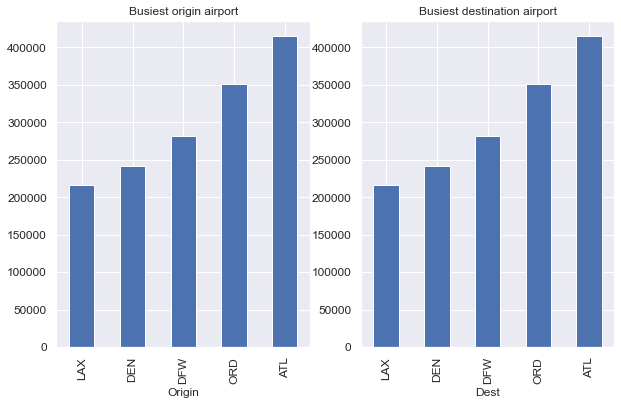

In [93]:
plt.subplot(1,2,1)
x = df_copy.groupby('Origin')['Origin'].count()
x = x.sort_values()
busy_origin = x.tail()
busy_origin.plot(kind = 'bar', fontsize = 12, figsize=[10, 6])
plt.title("Busiest origin airport")

plt.subplot(1,2,2)
y = df_copy.groupby('Dest')['Dest'].count()
y = y.sort_values()
busy_dest = y.tail()
busy_dest.plot(kind = 'bar', fontsize = 12)
plt.title("Busiest destination airport");

### **We can see that ATL is the busiest airport as both origin and destination**

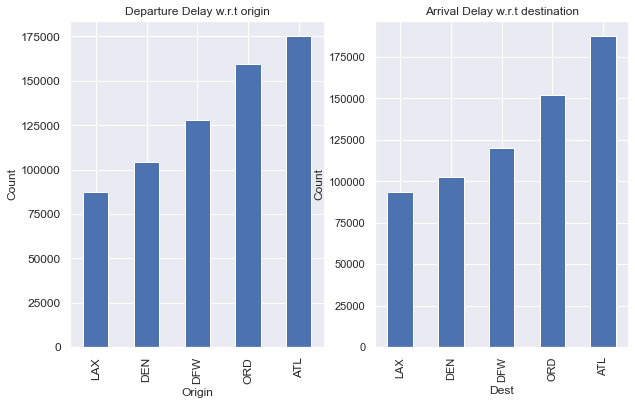

In [96]:
plt.subplot(1,2,1)
x = df_copy[df_copy['DepStatus']=='Late'].groupby('Origin')['DepStatus'].count()
x = x.sort_values()
DepDelay = x.tail()
DepDelay.plot(kind = 'bar', fontsize = 12, figsize=[10, 6])
plt.ylabel("Count")
plt.title("Departure Delay w.r.t origin")

plt.subplot(1,2,2)
y = df_copy[df_copy['ArrStatus']=='Late'].groupby('Dest')['ArrStatus'].count()
y = y.sort_values()
ArrDelay = y.tail()
ArrDelay.plot(kind = 'bar')
plt.ylabel("Count")
plt.title("Arrival Delay w.r.t destination");

### **We can find that also ATL is the most late airport for departure and arrival, this is convient since it's the busiest airport**

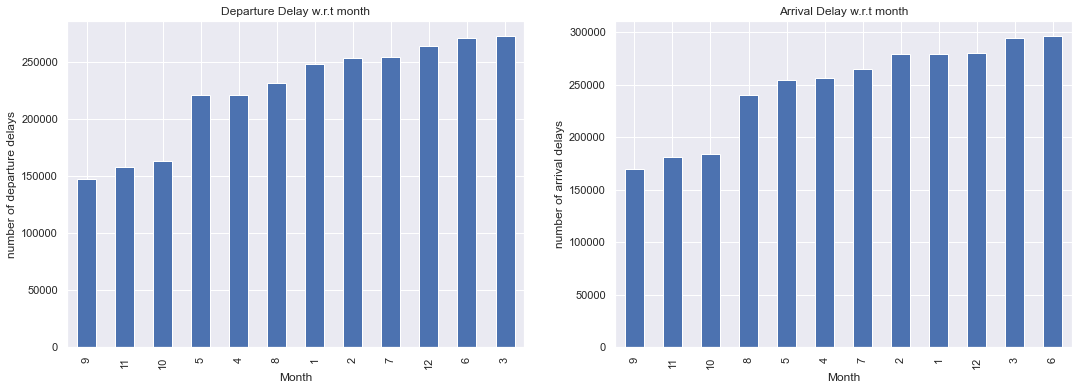

In [17]:
plt.subplot(1,2,1)
x = df_copy[df_copy['DepStatus']=='Late'].groupby('Month')['DepStatus'].count()
DepDelay = x.sort_values()
DepDelay.plot(kind = 'bar', figsize=[18, 6])
plt.ylabel("number of departure delays")
plt.title("Departure Delay w.r.t month")

plt.subplot(1,2,2)
y = df_copy[df_copy['ArrStatus']=='Late'].groupby('Month')['ArrStatus'].count()
ArrDelay = y.sort_values()
ArrDelay.plot(kind = 'bar')
plt.ylabel("number of arrival delays")
plt.title("Arrival Delay w.r.t month");

### **Here we can see that March, June and December are the months that has large number of late departed and arrived flights**

## Changes applied to the data:

### Number of airports in Origin and Destination was about 300 which is a large numer to analyze and get relations so I used only the top ten airports to investigate.

### Created a new column for Cancellation codes called it reason as just lettes (A, B, or C) will be not convient for the target user.

### Created 2 columnbs departure and arrival status as (on time, late, cancelled to be easily compared and also more understandable to the user.

## Bivariate Exploration

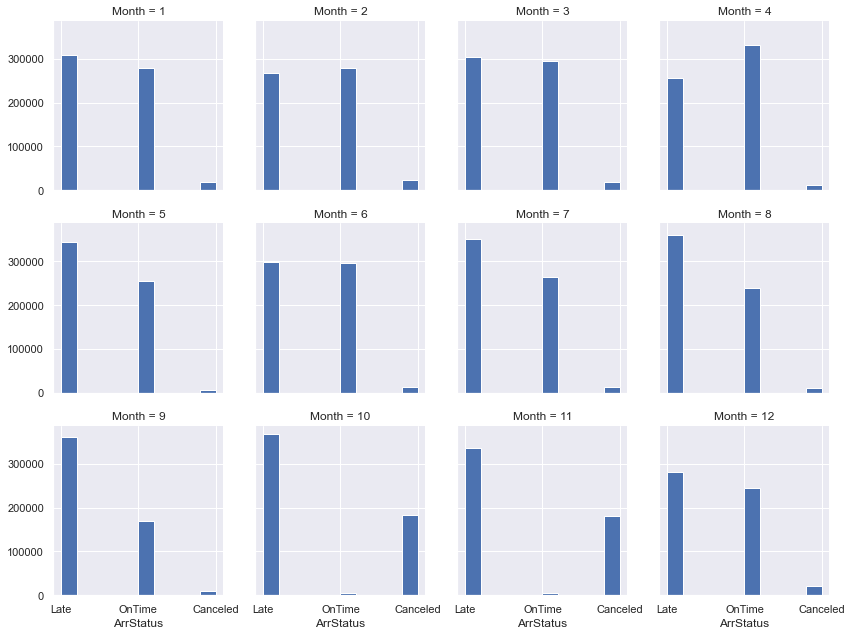

In [104]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df_copy, col = 'Month', col_wrap = 4)
g.map(plt.hist, "ArrStatus");

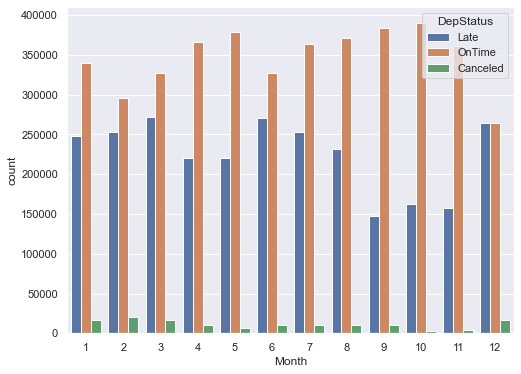

In [18]:
sb.set(rc={"figure.figsize":(8, 6)})
sb.countplot(data = df_copy, x = 'Month', hue = 'DepStatus');

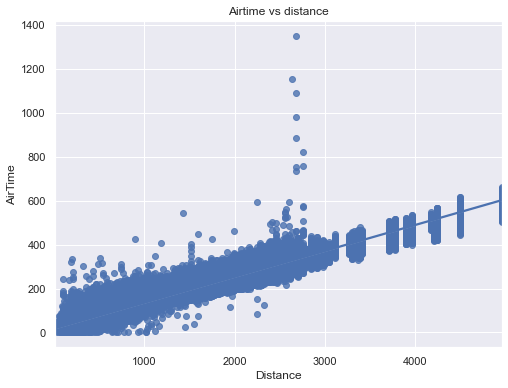

In [111]:
sb.regplot(data = df_copy, x = 'Distance', y = 'AirTime').set(title='Airtime vs distance');

### **We can note that as distance increase air time increase**

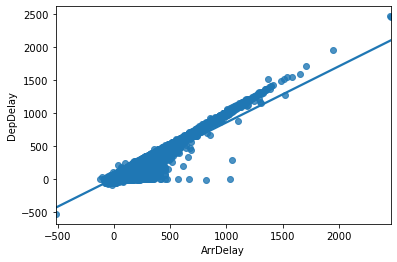

In [64]:
sb.regplot(data = df_copy, x = 'ArrDelay', y = 'DepDelay');

### **We can note that as departure delay increase arrival delay increase**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

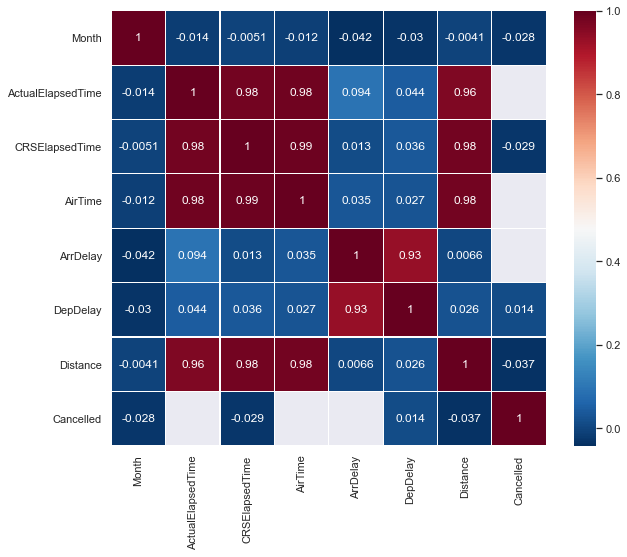

In [87]:
plt.figure(figsize=(10,8))
sb.heatmap(df_copy.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

### **Here we can confirm the relations we found before which is:**
#### Departure delay and Arrival delay have direct relation.
#### Elapsed time has direct relation with distance.
#### Air time and distance are directly related.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!